# LECTURE DU PROGRAMME

Premièrement, on va développer un algorithme que l'on va appliquer uniquement aux fonctions théoriques pour vérifier que tout fonctionne bien. Ensuite on va importer les données expérimentales, comparer ces données aux fonctions théoriques pour vérifier que cela colle bien et que l'on a fait de bonnes mesures, et enfin : appliquer l'algorithme aux fonctions mesurées, et puis analyser les résultats.

In [1]:
''' PACKAGES '''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt,atan2,log

## PARTIE THÉORIQUE

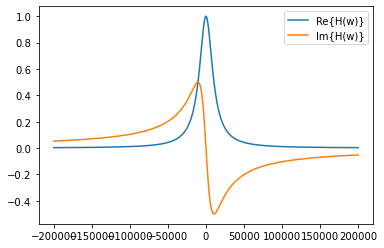

In [2]:
''' TRACÉ FONCTION DE TRANSFERT CIRCUIT RC THEORIQUE '''

N = 8192
w = np.linspace(-200000,200000,N) 
R = 9900 #R=9.9kOhm
C = 0.0000000096 #C=9.6nF

Re = [1/(1+(R*C*W)**2) for W in w]
Im = [(-R*C*W)/(1+(R*C*W)**2) for W in w]

plt.plot(w,Re,label="Re{H(w)}")
plt.plot(w,Im,label="Im{H(w)}")
plt.legend()
plt.show()

(-1.55, 0.05)

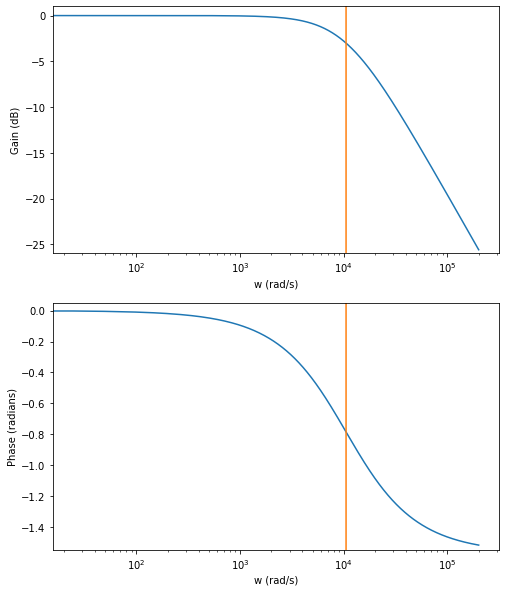

In [3]:
''' TRACÉ DIAGRAMME DE BODE THÉORIQUE '''

x_bode = np.linspace(0,200000,N)
wc = 1/(R*C)

Gain = [-10*log((1+((w**2)/(wc**2))),10) for w in x_bode]
Phase = [-atan2(w, wc) for w in x_bode]

x0 = [wc]*N #ligne verticale à w=wc
y0 = np.linspace(-26,1,N) #ligne verticale pour le gain
y1 = np.linspace(-1.55,0.05,N) #ligne verticale pour la phase


fig, axes = plt.subplots(2,figsize=(8,10))
      
axes[0].plot(x_bode, Gain,x0,y0)
axes[0].set_xscale("log")
axes[0].set_ylabel("Gain (dB)")
axes[0].set_xlabel("w (rad/s)")
axes[0].set_ylim([-26,1])

axes[1].plot(x_bode, Phase,x0,y1)
axes[1].set_xscale("log")
axes[1].set_ylabel("Phase (radians)")
axes[1].set_xlabel("w (rad/s)")
axes[1].set_ylim([-1.55,0.05])

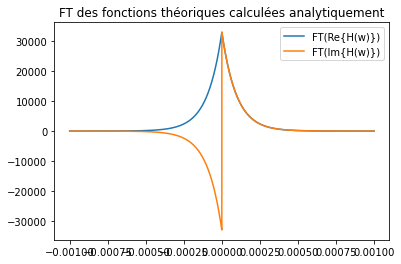

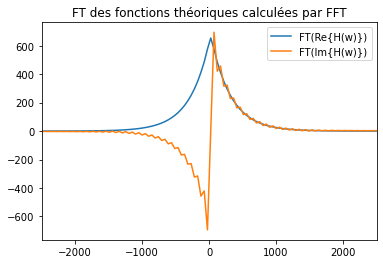

In [4]:
''' TEST FFT SUR LES FONCTIONS THEORIQUE '''

NN = 2**13
t = np.linspace(-1/1000,1/1000,NN)
ww = np.linspace(-200000,200000,NN)

FFT_theorique_Re = [np.pi/(R*C) * np.exp(-np.abs(k)/(R*C)) for k in t] #partie réelle uniquement
FFT_theorique_Im = [np.pi/(R*C) * np.exp(-np.abs(k)/(R*C)) * k/np.abs(k) for k in t] #partie imaginaire uniquement

plt.plot(t,FFT_theorique_Re,label="FT(Re{H(w)})")
plt.plot(t,FFT_theorique_Im,label="FT(Im{H(w)})")
plt.title("FT des fonctions théoriques calculées analytiquement")
plt.legend()
plt.show()

Re = [1/(1+(R*C*W)**2) for W in ww]
Im = [(-R*C*W)/(1+(R*C*W)**2) for W in ww]

FFT_calculee_Re = np.fft.fftshift(np.fft.fft(Re))
FFT_calculee_Im = np.fft.fftshift(np.fft.fft(Im))

FFT_calculee_Re_Fin = np.abs(FFT_calculee_Re)

FFT_calculee_Im = FFT_calculee_Im.imag
FFT_calculee_Im_Neg = FFT_calculee_Im[0:int((len(FFT_calculee_Im)/2))]
FFT_calculee_Im_Neg = -1*np.abs(FFT_calculee_Im_Neg)
FFT_calculee_Im_Pos = FFT_calculee_Im[int(len(FFT_calculee_Im)/2):int(len(FFT_calculee_Im))]
FFT_calculee_Im_Pos = np.abs(FFT_calculee_Im_Pos)
FFT_calculee_Im_Fin = np.concatenate((FFT_calculee_Im_Neg, FFT_calculee_Im_Pos))

plt.plot(ww,FFT_calculee_Re_Fin,label="FT(Re{H(w)})")
plt.plot(ww,FFT_calculee_Im_Fin,label="FT(Im{H(w)})")
plt.xlim([-2500,2500])
plt.title("FT des fonctions théoriques calculées par FFT")
plt.legend()
plt.show()

Ici on vérifie juste que le module de FFT fonctionne, et il fonctionne bien :)

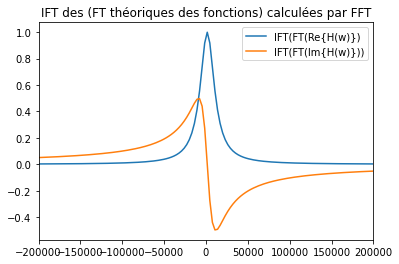

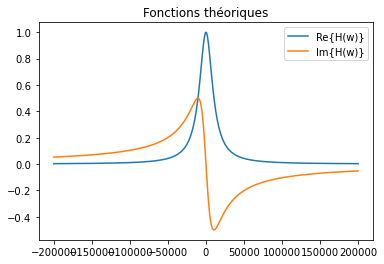

In [5]:
''' TEST IFFT SUR LES FONCTIONS THEORIQUE '''

wwbis = np.linspace(-12560000,12560000,NN) #bornes = 200000 * 2pi

IFFT_calculee_Re = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_theorique_Re)))
IFFT_calculee_Im = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_theorique_Im)))

IFFT_calculee_Re = IFFT_calculee_Re.real /3141 #on divise par (pi * 1000)
IFFT_calculee_Im = -1 * IFFT_calculee_Im.imag /3141

plt.plot(wwbis,IFFT_calculee_Re,label="IFT(FT(Re{H(w)})")
plt.plot(wwbis,IFFT_calculee_Im,label="IFT(FT(Im{H(w)}))")
plt.title("IFT des (FT théoriques des fonctions) calculées par FFT")
plt.xlim([-200000,200000])
plt.legend()
plt.show()

plt.plot(ww,Re,label="Re{H(w)}")
plt.plot(ww,Im,label="Im{H(w)}")
plt.title("Fonctions théoriques")
plt.legend()
plt.show()

Ici on vérifie juste que le module de IFFT fonctionne, et il fonctionne bien :)

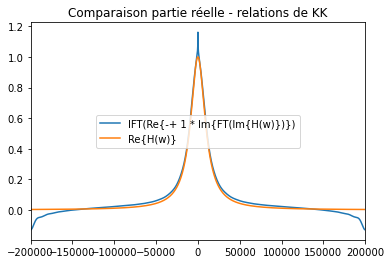

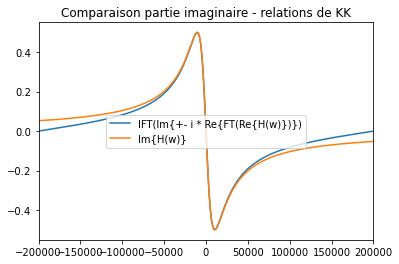

In [6]:
''' RELATIONS DE KK SUR LES FONCTIONS THEORIQUES '''

#CALCUL DE Re{-+ 1 * Im{FT(Im{H(w)})} et Im{+- i * Re{FT(Re{H(w)})}


#    Re{-+ 1 * Im{FT(Im{H(w)})}
FFT_calculee_Im_Fin_Neg = -1 * FFT_calculee_Im_Fin[0:int((len(FFT_calculee_Im)/2))]
FFT_calculee_Im_Fin_Pos = FFT_calculee_Im_Fin[int(len(FFT_calculee_Im)/2):int(len(FFT_calculee_Im))]
FFT_calculee_Im_Fin_bis = np.concatenate((FFT_calculee_Im_Fin_Neg, FFT_calculee_Im_Fin_Pos))
FFT_calculee_Im_Fin_bis[4096] = FFT_calculee_Re_Fin[4096]


#    Im{+- i * Re{FT(Re{H(w)})}
FFT_calculee_Re_Fin_Neg = -1 * FFT_calculee_Re_Fin[0:int((len(FFT_calculee_Re)/2))]
FFT_calculee_Re_Fin_Pos = FFT_calculee_Re_Fin[int(len(FFT_calculee_Re)/2):int(len(FFT_calculee_Re))]
FFT_calculee_Re_Fin_bis = np.concatenate((FFT_calculee_Re_Fin_Neg, FFT_calculee_Re_Fin_Pos))


#CALCUL DES IFT

IFFT_calculee_Re_KK = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Im_Fin_bis)))
IFFT_calculee_Im_KK = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Re_Fin_bis)))

IFFT_calculee_Re_KK = IFFT_calculee_Re_KK.real
IFFT_calculee_Im_KK = -1 * IFFT_calculee_Im_KK.imag

plt.plot(w,IFFT_calculee_Re_KK,label="IFT(Re{-+ 1 * Im{FT(Im{H(w)})})")
plt.plot(w,Re,label="Re{H(w)}")
plt.title("Comparaison partie réelle - relations de KK")
plt.legend(loc='center')
plt.xlim([-200000,200000])
plt.show()

plt.plot(ww,IFFT_calculee_Im_KK,label="IFT(Im{+- i * Re{FT(Re{H(w)})})")
plt.plot(ww,Im,label="Im{H(w)}")
plt.title('Comparaison partie imaginaire - relations de KK')
plt.legend(loc='center')
plt.xlim([-200000,200000])
plt.show()

### CONCLUSION

Finalement, on voit que les relations de KK fonctionnent assez bien. Sur les fonctions théoriques, elles devraient même fonctionner parfaitement mais on est limité par le fait qu'on fait des FFT discrètes : on n'a pas les valeurs de $H(\omega)$ de manière continue sur tout l'axe réel mais seulement de manière discrète entre $-200000$ et $200000$, il est donc normal que l'on ait des divergences aux bornes et en $0$.

## PARTIE EXPÉRIMENTALE

In [7]:
''' LECTURE TABLEAU EXCEL '''

df = pd.read_excel ('scope_8 (2).xlsx')

print (df)

print(df['Re'][3:2001])

            x-axis           Re           Im
0           second         Volt         Volt
1     151.50000e00  10.05930e00  -402.01e-03
2     151.52500e00  10.05930e00  -402.01e-03
3     151.55000e00  10.05930e00  -402.01e-03
4     151.57500e00  10.05930e00  -402.01e-03
...            ...          ...          ...
1996  201.37500e00    25.13e-03  -603.02e-03
1997  201.40000e00   175.88e-03  -603.02e-03
1998  201.42500e00       0.0e00  -603.02e-03
1999  201.45000e00   175.88e-03  -603.02e-03
2000  201.47500e00    25.13e-03  -603.02e-03

[2001 rows x 3 columns]
3       10.05930e00
4       10.05930e00
5       10.01930e00
6       10.01930e00
7       10.01930e00
           ...     
1996      25.13e-03
1997     175.88e-03
1998         0.0e00
1999     175.88e-03
2000      25.13e-03
Name: Re, Length: 1998, dtype: object


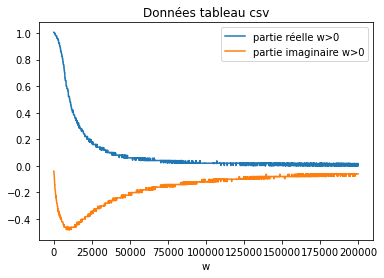

In [8]:
''' TRACÉ FONCTIONS MESURÉES '''

# FAIRE DES LISTES AVEC LE TABLEAU EXCEL

L_Re = []
L_Im = []

i=1
while i<= 1998: #on prend les valeurs de 3 à 2001 car les 2 premières lignes ne sont pas des données mais des titres
    L_Re.append(float(df['Re'][2+i])/10)
    L_Im.append(float(df['Im'][2+i])/10)
    i+=1

#on divise par le facteur de conversion entre les valeurs affichées par l'oscillo et le lock-in qui vaut 10
x = np.linspace(0,200000,len(L_Re)) #mesures faites de f=1Hz (approximé à 0) jusqu'à f = 32kHz -> 2*pi*f = 200000 rad.s^-1

# TRACÉ

plt.plot(x,L_Re,label="partie réelle w>0")
plt.plot(x,L_Im,label="partie imaginaire w>0")
plt.title("Données tableau csv")
plt.xlabel("w")
plt.legend()
plt.savefig("Données tableau.png", dpi=300)
plt.show()

Text(0.5, 0.98, 'Bode plot of a RC circuit with R = 9.9kOhm and C=9.6nF')

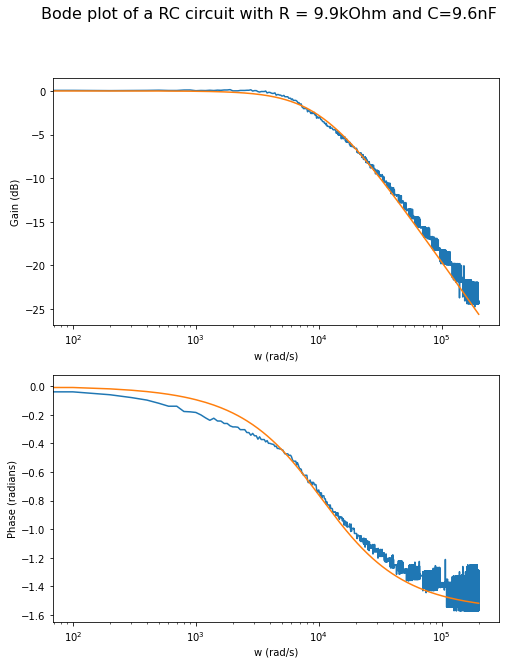

In [9]:
''' COMPARAISON DIAGRAMME DE BODE '''

#module et phase de H(w) expérimentaux

x = np.linspace(0,200000,len(L_Re))
mod_H = [sqrt(np.abs(L_Re[k])**2+np.abs(L_Im[k])**2) for k in range(len(x))]
phase_H = [atan2(L_Im[k],L_Re[k]) for k in range(len(x))]

gain_H = [20*log(mod_H[k],10) for k in range(len(x))]

x_bode = np.linspace(0,200000,len(L_Re))

#module et phase de H(w) théoriques

R = 9900 #R=9.9kOhm
C = 0.0000000096 #C=9.6nF
wc = 1/(R*C)

Gain_Theorique = [-10*log((1+((w**2)/(wc**2))),10) for w in x_bode]
Phase_Theorique = [-atan2(w, wc) for w in x_bode]

fig, axes = plt.subplots(2,figsize=(8,10))
      
axes[0].plot(x_bode, gain_H,x_bode,Gain_Theorique)
axes[0].set_xscale("log")
axes[0].set_ylabel("Gain (dB)")
axes[0].set_xlabel("w (rad/s)")

axes[1].plot(x_bode, phase_H,x_bode,Phase_Theorique)
axes[1].set_xscale("log")
axes[1].set_ylabel("Phase (radians)")
axes[1].set_xlabel("w (rad/s)")

fig.suptitle('Bode plot of a RC circuit with R = 9.9kOhm and C=9.6nF', fontsize=16)

__COMMENTAIRE__ : <br/>
*En __bleu__ les fonctions __expérimentales__* <br/>
*En __orange__ les fonctions __théoriques__*

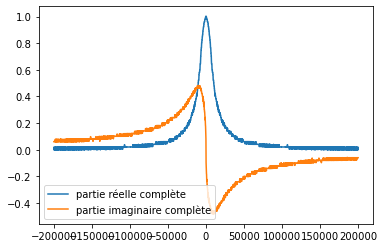

In [10]:
''' TRACÉ COMPLET MESURES '''

# PARTIE REELLE

L_Re_New_Positif = L_Re[3:2001]
L_Re_New_Negatif = L_Re[3:2001]
L_Re_New_Negatif.reverse()

#on prend le symétrique de ce qu'on a mesuré car on sait que la partie réelle est symétrique (et on ne peut mesurer que pour les fréquences positives)

L_Re_New = L_Re_New_Negatif + L_Re_New_Positif #on concatène les listes pour avoir la fonction finale
x_Re_New = np.linspace(-200000,200000,len(L_Re_New))

# PARTIE IMAGINAIRE

L_Im_New_Positif = L_Im[3:2001]
L_Im_New_Negatif = L_Im[3:2001]
L_Im_New_Negatif.reverse()

for k in range(len(L_Im_New_Negatif)):
    L_Im_New_Negatif[k]*=-1
    
#on prend l'opposé de ce qu'on a mesuré car on sait que la partie imaginaire est antisymétrique (et on ne peut mesurer que pour les fréquences positives)

L_Im_New = L_Im_New_Negatif + L_Im_New_Positif #on concatène les listes pour avoir la fonction finale
x_Im_New = np.linspace(-200000,200000,len(L_Im_New))
  
plt.plot(x_Re_New,L_Re_New,label="partie réelle complète")
plt.plot(x_Im_New,L_Im_New,label="partie imaginaire complète")
plt.legend()
plt.show()

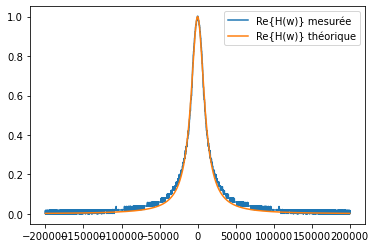

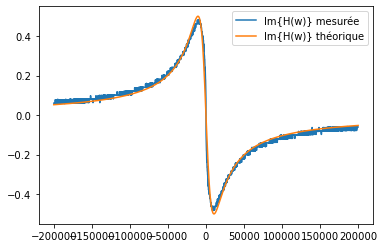

In [11]:
''' COMPARAISON MESURE VS THEORIQUE '''

# PARTIE REELLE

plt.plot(x_Re_New,L_Re_New,label="Re{H(w)} mesurée")
plt.plot(w,Re,label="Re{H(w)} théorique")
plt.legend()
plt.savefig("Partie réelle mesurée VS théorique.png", dpi=300)
plt.show()

# PARTIE IMAGINAIRE

plt.plot(x_Im_New,L_Im_New,label="Im{H(w)} mesurée")
plt.plot(w,Im,label="Im{H(w)} théorique")
plt.legend()
plt.savefig("Partie imaginaire mesurée VS théorique.png", dpi=300)
plt.show()

__COMMENTAIRE__ : *Allure des courbes bonnes*

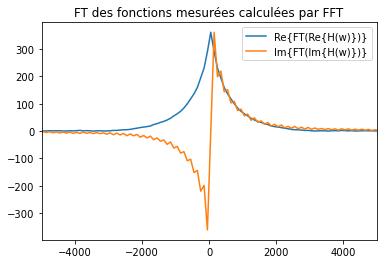

In [12]:
''' TEST FFT SUR LES FONCTIONS MESUREES '''

FFT_calculee_Re_Mes = np.fft.fftshift(np.fft.fft(L_Re_New))
FFT_calculee_Im_Mes = np.fft.fftshift(np.fft.fft(L_Im_New))

FFT_calculee_Re_Mes_Fin = np.abs(FFT_calculee_Re_Mes)

FFT_calculee_Im_Mes = FFT_calculee_Im_Mes.imag
FFT_calculee_Im_Mes_Neg = FFT_calculee_Im_Mes[0:int((len(FFT_calculee_Im_Mes)/2))]
FFT_calculee_Im_Mes_Neg = -1*np.abs(FFT_calculee_Im_Mes_Neg)
FFT_calculee_Im_Mes_Pos = FFT_calculee_Im_Mes[int(len(FFT_calculee_Im_Mes)/2):int(len(FFT_calculee_Im_Mes))]
FFT_calculee_Im_Mes_Pos = np.abs(FFT_calculee_Im_Mes_Pos)
FFT_calculee_Im_Mes_Fin = np.concatenate((FFT_calculee_Im_Mes_Neg, FFT_calculee_Im_Mes_Pos))

plt.plot(x_Re_New,FFT_calculee_Re_Mes_Fin,label="Re{FT(Re{H(w)})}")
plt.plot(x_Im_New,FFT_calculee_Im_Mes_Fin,label="Im{FT(Im{H(w)})}")
plt.xlim([-5000,5000])
plt.title("FT des fonctions mesurées calculées par FFT")
plt.legend()
plt.show()

__COMMENTAIRE__ : *Allure des courbes bonnes*

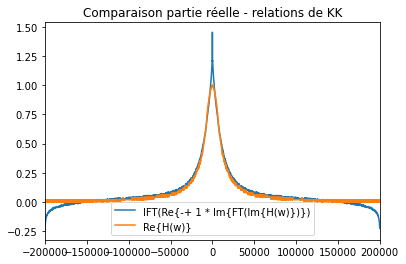

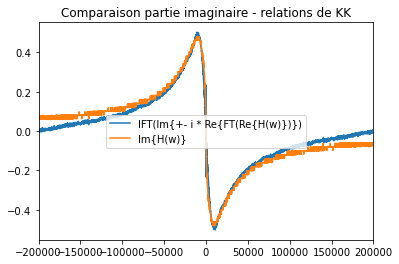

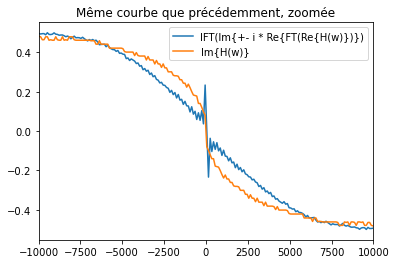

In [13]:
''' COMPARAISON RÉSULTATS FINAUX '''

# CALCUL DE Im{+- i * Re{FT(Re{H(w)})} ET Re{-+ 1 * Im{FT(Im{H(w)})}

FFT_calculee_Im_Mes_Fin_Neg = -1 * FFT_calculee_Im_Mes_Fin[0:int((len(FFT_calculee_Im_Mes)/2))]
FFT_calculee_Im_Mes_Fin_Pos = FFT_calculee_Im_Mes_Fin[int(len(FFT_calculee_Im_Mes)/2):int(len(FFT_calculee_Im_Mes))]
FFT_calculee_Im_Mes_Fin_bis = np.concatenate((FFT_calculee_Im_Mes_Fin_Neg, FFT_calculee_Im_Mes_Fin_Pos))
FFT_calculee_Im_Mes_Fin_bis[1995] = FFT_calculee_Re_Mes_Fin[1995]

FFT_calculee_Re_Mes_Fin_Neg = -1 * FFT_calculee_Re_Mes_Fin[0:int((len(FFT_calculee_Re_Mes)/2))]
FFT_calculee_Re_Mes_Fin_Pos = FFT_calculee_Re_Mes_Fin[int(len(FFT_calculee_Re_Mes)/2):int(len(FFT_calculee_Re_Mes))]
FFT_calculee_Re_Mes_Fin_bis = np.concatenate((FFT_calculee_Re_Mes_Fin_Neg, FFT_calculee_Re_Mes_Fin_Pos))

# CALCUL DES IFT

IFFT_calculee_Re_Mes = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Im_Mes_Fin_bis))) #on vérifie que IFT(Re(+-1 Im(FT(Im)))) = Re
IFFT_calculee_Im_Mes = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Re_Mes_Fin_bis))) #on vérifie que IFT(Im(+-i Re(FT(Re)))) = Im

IFFT_calculee_Re_Mes = IFFT_calculee_Re_Mes.real
IFFT_calculee_Im_Mes = -1 * IFFT_calculee_Im_Mes.imag

# TRACÉS

plt.plot(x_Re_New,IFFT_calculee_Re_Mes,label="IFT(Re{-+ 1 * Im{FT(Im{H(w)})})")
plt.plot(x_Re_New,L_Re_New,label="Re{H(w)}")
plt.title("Comparaison partie réelle - relations de KK")
plt.legend()
plt.xlim([-200000,200000])
plt.show()

plt.plot(x_Im_New,IFFT_calculee_Im_Mes,label="IFT(Im{+- i * Re{FT(Re{H(w)})})")
plt.plot(x_Im_New,L_Im_New,label="Im{H(w)}")
plt.title('Comparaison partie imaginaire - relations de KK')
plt.legend()
plt.xlim([-200000,200000])
plt.show()

plt.plot(x_Im_New,IFFT_calculee_Im_Mes,label="IFT(Im{+- i * Re{FT(Re{H(w)})})")
plt.plot(x_Im_New,L_Im_New,label="Im{H(w)}")
plt.title('Même courbe que précédemment, zoomée')
plt.legend()
plt.xlim([-10000,10000])
plt.show()

### CONCLUSION

Quelques erreurs aux bornes ($\pm 20000$) et en $0$ pour les mêmes raisons que les courbes théoriques : en faisant des FFT et IFFT du bruit se rajoute à chaque fois en plus du bruit initial et des problèmes discret/continu, mais sinon on est bon, car on a les mêmes erreurs qu'avec les fonctions théoriques !

__COMMENTAIRE__ : *On n'a pas une puissance de 2 pour le nombre de valeurs dans notre algorithme de FFT, en fait c'est pas grave, techniquement ça rajoute juste du temps de calcul mais ça reste très correct (on a testé en croppant les listes de valeurs pour avoir une puissance de 2, et les résultats sont les mêmes)*

/var/folders/hr/s9m3q6jd7qbc4n7_vbhfh73w0000gn/T/ipykernel_8124/3224939231.py:3: RuntimeWarning: divide by zero encountered in true_divide
  diff_Re = (L_Re_New-IFFT_calculee_Re_Mes)**2/np.abs(L_Re_New)


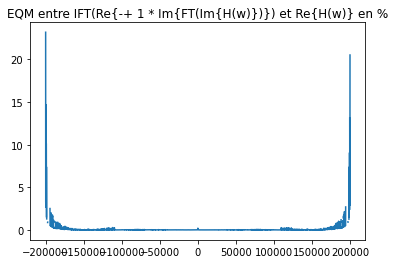

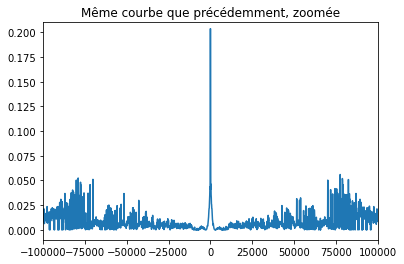

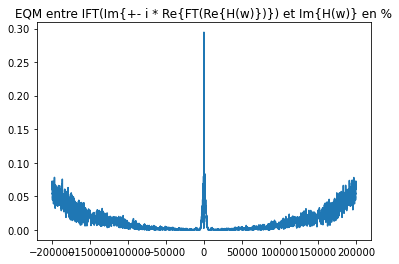

In [14]:
''' PLOT DES DIFFERENCES '''

diff_Re = (L_Re_New-IFFT_calculee_Re_Mes)**2/np.abs(L_Re_New)

diff_Im = (L_Im_New-IFFT_calculee_Im_Mes)**2/np.abs(L_Im_New)

plt.plot(x_Re_New,diff_Re)
plt.title("EQM entre IFT(Re{-+ 1 * Im{FT(Im{H(w)})}) et Re{H(w)} en %")
plt.show()

plt.plot(x_Re_New,diff_Re)
plt.title("Même courbe que précédemment, zoomée")
plt.xlim([-100000,100000])
plt.ylim([-0.01,0.21])
plt.show()

plt.plot(x_Re_New,diff_Im)
plt.title("EQM entre IFT(Im{+- i * Re{FT(Re{H(w)})}) et Im{H(w)} en %")
plt.show()

*EQM = Ecart Quadratique Moyen

__COMMENTAIRE__ : *il est normal d'observer une différence "significative" en $0$ et aux bornes $\pm \infty \; (\infty = 200000)$ à cause de l'algorithme de DFT et de ses coupages et shifts en $0$ et aux bornes $\pm \infty$ (rappelons qu'on ne peut pas faire des mesures infinies donc il y a des divergences en $0$ et $\pm \infty$ qui s'ajoutent pendant la FT et pendant la IFT, mais en général, les différences sont quand même assez faibles !*